In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv("Full_Data.csv")

data_X = data.values[:, :-1]
data_Y = data.values[:, -1].astype("int")

# Splitting dataset into training and test set
#train X_full,Y
X_full, test_X_full, Y, test_Y = train_test_split(data_X, data_Y, test_size=0.4, shuffle=True, random_state=1)

In [72]:
attr1 = 2
attr2 = 3
X = X_full[:, (attr1, attr2)]
test_X = test_X_full[:, (attr1, attr2)]


In [73]:
# Combining input data with fabricated output class
X = np.hstack((np.ones((X.shape[0], 1)), X))#stack or concatenate array in horizontall
print("The regenerated input data has class labels set to 1:\n", X)

The regenerated input data has class labels set to 1:
 [[  1.    27.72 461.  ]
 [  1.    26.27  33.5 ]
 [  1.    21.27 455.5 ]
 ...
 [  1.    26.36 758.25]
 [  1.    26.52  23.5 ]
 [  1.    27.05 574.25]]


In [74]:
def sigmoid(z):
    # z --> input
    # sigmoid_z --> output of sigmoid function
    z = z.astype(float)
    sigmoid_z = 1/(1+np.exp(-z))
    
    return sigmoid_z

In [75]:
def loss(Y, y_hat):
    # Y --> data
    # y_hat --> w
    m= Y.shape[0]
    loss = (-1/m) * np.sum(Y*np.log(y_hat + 1e-10) + (1-Y)*np.log(1-y_hat + 1e-10))
    return -loss

In [76]:
def gradients(X, Y, y_hat):
    # X --> input
    # Y --> true/target value
    # y_hat --> hypothesis/predictions
    # n --> number of training examples
    
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights
    dw = (1/m) * np.dot(X.T, y_hat - Y)
    
    return dw

In [77]:
def normalize(X):
    # X --> input
    # n --> number of training examples
    # d --> number of features 
    n, d = X.shape
    
    # Normalizing all the d features of X (except the bias (first) column)
    for i in range(d-1):
        X[:,i+1] = (X[:,i+1] - X[:,i+1].mean(axis=0))/X[:,i+1].std(axis=0)
        
    return X

In [78]:
def predict(X,w):
    # X --> Input.
    
    # Normalizing the inputs.
    X = normalize(X)
    
    # Calculating prediction/y_hat.
    preds = sigmoid(np.dot(X, w))
    
    # Empty List to store predictions.
    pred_class = []
    for num in preds:
        if num>=0.5:
            pred_class.append(1)
        else:
            pred_class.append(0)
    
    return np.array(pred_class)

In [79]:
def plot_decision_boundary(X,w):
    ydisp = -(w[0] + w[1] * X)/w[2]
    
    fig = plt.figure(figsize=(10, 8))
    plt.plot(X[:, 1][Y==0], X[:, 2][Y==0], "^")
    plt.plot(X[:, 1][Y==1], X[:, 2][Y==1], "s")
    
    plt.xlim([-2, 5])
    plt.ylim([-2, 5])
    plt.xlabel("Attribute 1")
    plt.ylabel("Attribute 2")
    plt.title("Decision Boundary")
    plt.plot(X, ydisp)

In [80]:
# Defining training function
def train(X, Y, epochs, eta):
    # X --> input
    # Y --> true/target value
    # bs --> batch size
    # eta --> learning rate
    # n-> number of training examples
    # d-> number of features 
    
    n, d = X.shape
    
    
    # Initializing weights and bias to zeros
    w = np.zeros((d,1))
    
    # Reshaping Y
    Y = Y.reshape(n,1)
    
    # Normalizing the inputs
    X = normalize(X)
    
    # Empty list to store losses
    losses = []
    
    # Training loop
    for epoch in range(epochs):
        
            # Calculating hypothesis/prediction
            y_hat = sigmoid(np.dot(X,w))
            
            # Getting the gradients of loss w.r.t parameters
            dw = gradients(X,Y,y_hat)
            
            # Updating the parameters.
            w = w- eta*dw
            
            # Calculating loss and appending it in the list
            l = loss(Y,y_hat)
            losses.append(l)
        
    # Returning weights, losses(List)
    return w, losses

In [81]:
w, l = train(X, Y, epochs=100, eta=90)

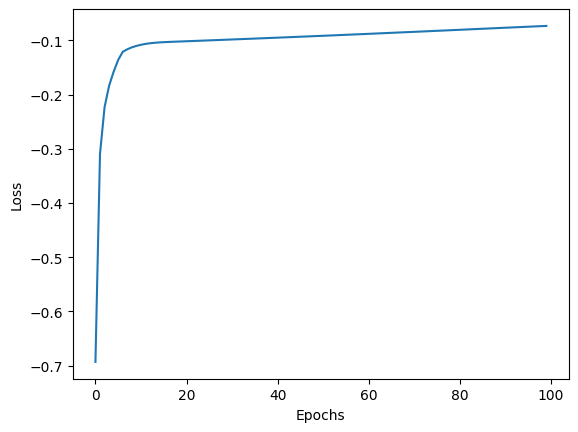

In [82]:
plt.plot(l)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [83]:
print("The accuracy of model is",(np.sum(1*(Y==predict(X,w)))/len(Y))*100,"%")

The accuracy of model is 98.89189189189189 %


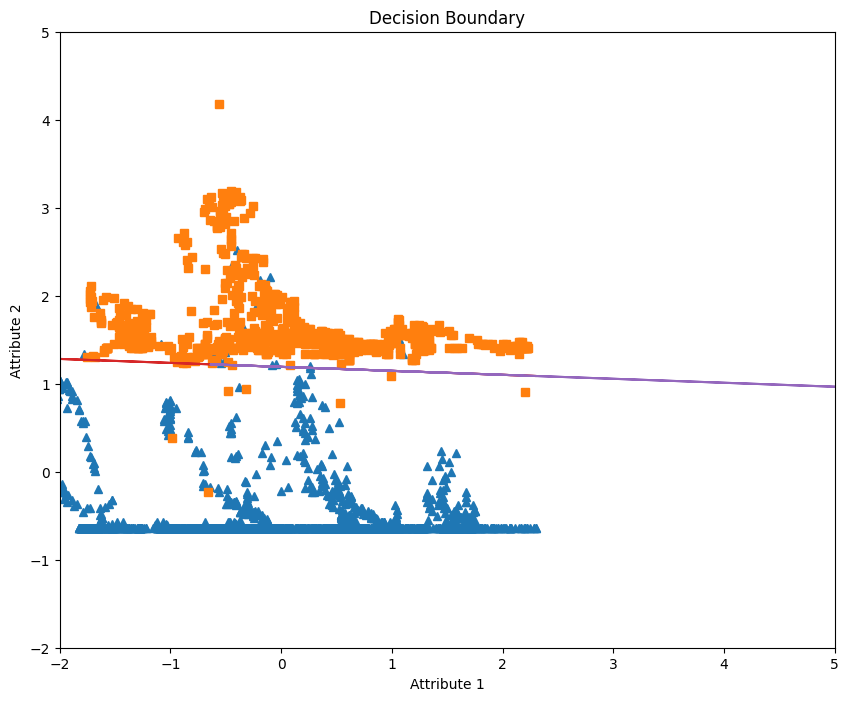

In [84]:
plot_decision_boundary(X, w)

In [85]:
test_X = np.hstack((np.ones((test_X.shape[0],1)), test_X))
ml_predictions = predict(test_X,w)
print("The test accuracy of model is",(np.sum(1*(test_Y==ml_predictions))/len(test_Y))*100,"%")

The test accuracy of model is 98.86547811993516 %


In [86]:
row_idx = np.concatenate((test_X_full[:, 0].astype(int), X_full[:, 0].astype(int)))
opt_cls = np.concatenate((ml_predictions.astype(int), Y.astype(int)))
                              
output_data = np.concatenate((row_idx.reshape(-1,1), opt_cls.reshape(-1,1)), axis=1)
pd.DataFrame(output_data, columns=["RowIdx", "OutputClass"]).to_csv("Output_Data.csv", index=False)